In [1]:
import json

with open("activites.json", "r") as f:
    activites_data = json.load(f)


In [2]:
from dataclasses import dataclass
from typing import List

@dataclass
class PointGPS:
    time: float
    latitude: float
    longitude: float
    altitude: float
    distance: float
    heartRate: int
    speed: float
    runCadence: int
    watts: int

@dataclass
class Lap:
    start_time: str
    total_time: float
    distance: float
    max_speed: float
    calories: int
    avg_hr: int
    max_hr: int
    intensity: str
    trigger: str
    points: List[PointGPS]

@dataclass
class Activite:
    sport: str
    id: str
    laps: List[Lap]

def from_dict_to_objects(data: List[dict]) -> List[Activite]:
    return [
        Activite(
            sport=a["sport"],
            id=a["id"],
            laps=[
                Lap(
                    start_time=lap["start_time"],
                    total_time=lap["total_time"],
                    distance=lap["distance"],
                    max_speed=lap["max_speed"],
                    calories=lap["calories"],
                    avg_hr=lap["avg_hr"],
                    max_hr=lap["max_hr"],
                    intensity=lap["intensity"],
                    trigger=lap["trigger"],
                    points=[
                        PointGPS(**point)
                        for point in lap["points"]
                    ]
                )
                for lap in a["laps"]
            ]
        )
        for a in data
    ]


In [3]:
# Recharger depuis le JSON
with open("activites.json", "r") as f:
    activites = json.load(f)

# Reconvertir en objets dataclass
toutes_les_activites = from_dict_to_objects(activites_data)


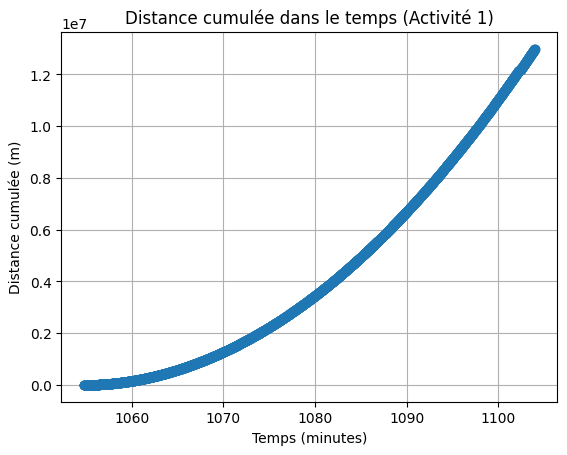

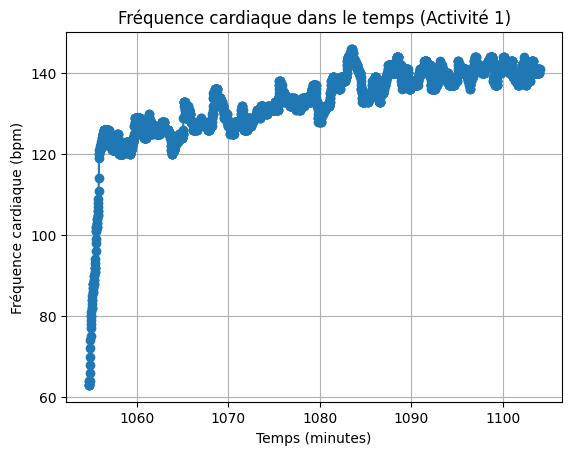

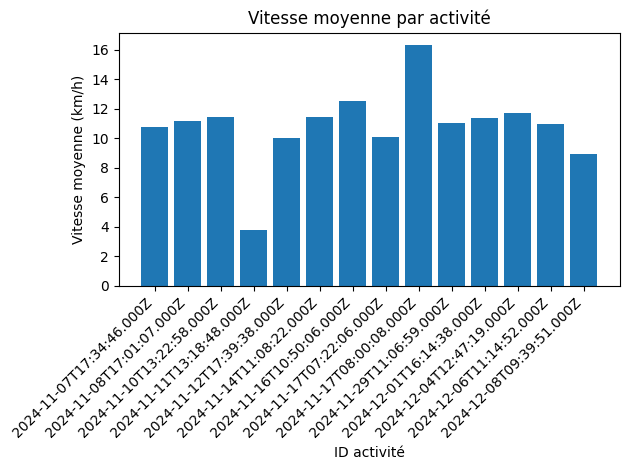

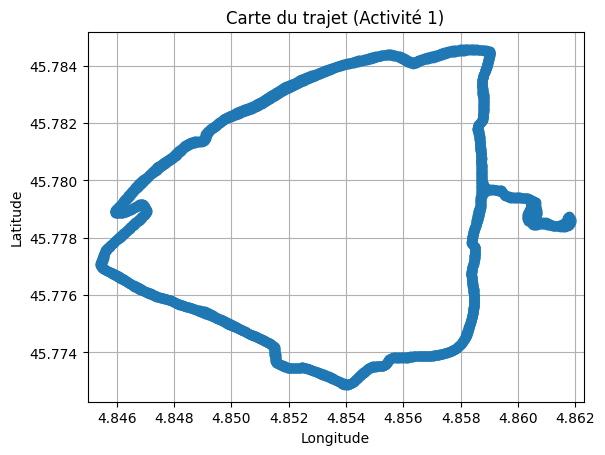

In [5]:
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────────────────────
# A) Distance cumulée dans le temps (pour la première activité)
# ─────────────────────────────────────────────────────────────────────────────
distances = []
times = []
cum_dist = 0.0

# On convertit les timestamps en minutes depuis le début
def time_to_minutes(ts):
    # ts = "2025-06-01T07:35:12.000Z" ou "2025-06-01T07:35:12Z"
    time_part = ts.split("T")[1].replace("Z","")
    h_str, m_str, s_str = time_part.split(":")
    h = int(h_str)
    m = int(m_str)
    s = float(s_str)     # accepte "12" ou "12.000"
    return h*60 + m + s/60


for lap in activites[0]["laps"]:
    for pt in lap["points"]:
        cum_dist += pt["distance"]
        distances.append(cum_dist)
        times.append(time_to_minutes(pt["time"]))

plt.figure()
plt.plot(times, distances, marker="o", linestyle="-")
plt.title("Distance cumulée dans le temps (Activité 1)")
plt.xlabel("Temps (minutes)")
plt.ylabel("Distance cumulée (m)")
plt.grid(True)
plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# B) Fréquence cardiaque dans le temps (Activité 1)
# ─────────────────────────────────────────────────────────────────────────────
hr = []
times_hr = []

for lap in activites[0]["laps"]:
    for pt in lap["points"]:
        hr.append(pt["heartRate"])
        times_hr.append(time_to_minutes(pt["time"]))

plt.figure()
plt.plot(times_hr, hr, marker="o", linestyle="-")
plt.title("Fréquence cardiaque dans le temps (Activité 1)")
plt.xlabel("Temps (minutes)")
plt.ylabel("Fréquence cardiaque (bpm)")
plt.grid(True)
plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# C) Vitesse moyenne par activité (toutes activités)
# ─────────────────────────────────────────────────────────────────────────────
ids = []
avg_speeds = []

for act in activites:
    ids.append(act["id"])
    total_dist = sum(lap["distance"] for lap in act["laps"])
    total_time_s = sum(lap["total_time"] for lap in act["laps"])
    kmh = (total_dist / total_time_s) * 3.6 if total_time_s > 0 else 0
    avg_speeds.append(kmh)

plt.figure()
plt.bar(ids, avg_speeds)
plt.title("Vitesse moyenne par activité")
plt.xlabel("ID activité")
plt.ylabel("Vitesse moyenne (km/h)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# D) Carte du trajet (Longitude vs Latitude pour Activité 1)
# ─────────────────────────────────────────────────────────────────────────────
lons, lats = [], []
for lap in activites[0]["laps"]:
    for pt in lap["points"]:
        lons.append(pt["longitude"])
        lats.append(pt["latitude"])

plt.figure()
plt.plot(lons, lats, marker="o", linestyle="-")
plt.title("Carte du trajet (Activité 1)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.axis("equal")
plt.grid(True)
plt.show()